In [1]:
from vnstock import *
from function import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [13]:
ticket = ['CII','CTD','CTG','DHG','DPM','EIB','FPT','GAS','GMD','HDB','HPG','MBB','MSN','MWG','NVL','PNJ','REE','ROS','SAB','SBT','SSI','STB','TCB','VCB','VHM','VIC','VJC','VNM','VPB','VRE']

frame = []
for i in ticket:
    a = stock_historical_data(symbol=i, 
                            start_date="2013-01-01", 
                            end_date='2023-02-11')    
    a["ticker"] = i
    frame.append(a)

close= pd.concat(frame).pivot_table(values="Close", columns="ticker", index="TradingDate")

### Markowitz model

In [73]:
w = marko_weights(close)
returns=close.pct_change()

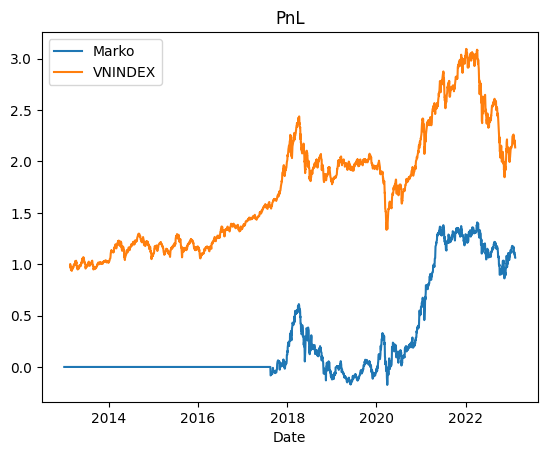

In [75]:
a = Simresult(w,returns=returns)
a.plot_pnl("Marko")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumprod(m["indexValue"].pct_change()+1), label="VNINDEX")
plt.legend()

### Alpha = ts_delta(close,5)

In [14]:
lag = 5
close_t5=close-close.shift(lag)

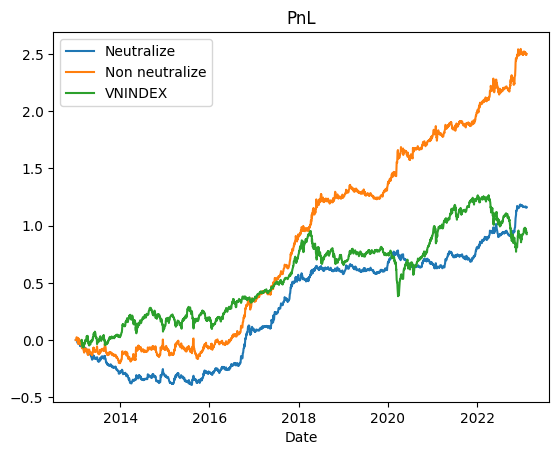

In [15]:
returns = close.pct_change()
w  = weights1(close_t5, neutrali=1)
neu=Simresult(weights=w,returns=returns)
neu.plot_pnl(type="Neutralize")

w1  = weights1(close_t5, neutrali=0)
non_neu=Simresult(weights=w1,returns=returns)
non_neu.plot_pnl(type="Non neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [16]:
neu.get_summary()

,Return,Sharpe,Turnover
TradingDate,,,
2013,-0.286821,-2.863795,0.628499
2014,-0.027235,-0.252777,0.603191
2015,0.025224,0.234567,0.585701
2016,0.371460,3.035229,0.581179
2017,0.463781,3.483185,0.542485
2018,0.031907,0.277685,0.577621
2019,0.093540,1.033840,0.622486
2020,-0.009300,-0.083557,0.577321
2021,0.138347,1.392224,0.563189


In [18]:
non_neu.get_summary()

,Return,Sharpe,Turnover
TradingDate,,,
2013,-0.200281,-1.301853,0.633236
2014,0.113767,0.667203,0.611300
2015,0.022115,0.144314,0.596954
2016,0.402133,2.803389,0.548013
2017,0.576685,4.164778,0.518273
2018,0.327371,1.617240,0.582216
2019,0.123876,1.150296,0.625107
2020,0.420794,2.003896,0.587899
2021,0.209164,1.278138,0.609508


### Alpha = rank(ts_delta(close,5))

In [76]:
lag = 5
close_t5=close-close.shift(lag)
alpha2 = (close_t5.rank(axis=1).div(close_t5.rank(axis=1).sum(axis=1),axis=0))
w =weights1(alpha2)
w1 =weights1(alpha2,neutrali=1)

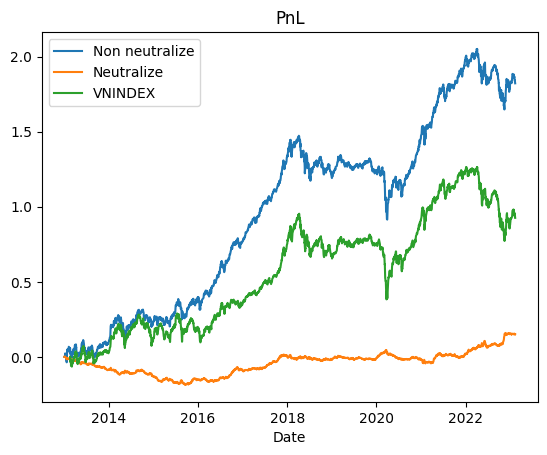

In [77]:
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [27]:
a.get_summary()

,Return,Sharpe,Turnover
TradingDate,,,
2013,0.097369,0.649807,0.292286
2014,0.132952,0.804325,0.298899
2015,0.163126,1.090661,0.286465
2016,0.377523,2.724458,0.281287
2017,0.559970,5.101108,0.257363
2018,-0.119771,-0.520215,0.267524
2019,0.034172,0.326177,0.279527
2020,0.225970,0.983369,0.281627
2021,0.524897,2.464990,0.278822


In [28]:
b.get_summary()

,Return,Sharpe,Turnover
TradingDate,,,
2013,-0.085402,-2.273450,0.292286
2014,-0.046229,-1.220652,0.298840
2015,-0.020374,-0.526252,0.286465
2016,0.061601,1.719326,0.281207
2017,0.095194,2.816622,0.257273
2018,-0.025029,-0.601305,0.267456
2019,0.013281,0.503809,0.279527
2020,-0.011161,-0.292264,0.281627
2021,0.035685,0.818678,0.278822


### ts_stddev(close,20)/(ts_sum(close,20)/20)

In [37]:
alpha3 = close.rolling(20).std()/close.rolling(20).mean()
alpha3 = alpha3.rank(ascending=True)

In [38]:
w =weights1(alpha3, neutrali=0)
w1 =weights1(alpha3,neutrali=1)

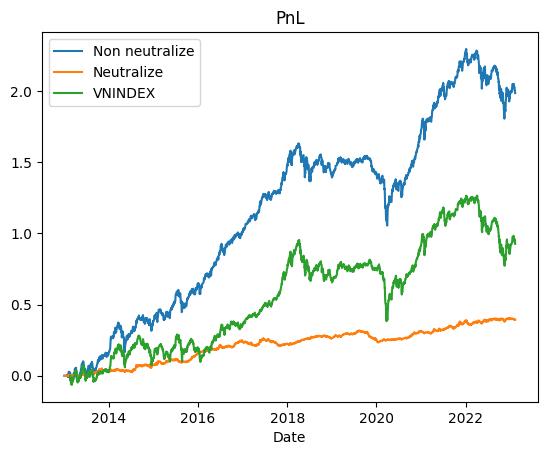

In [71]:
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [72]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.155355,0.919214,0.073334,1.337912,2118.468429
2014,0.223178,1.197458,0.076556,2.044543,2915.225896
2015,0.267160,1.608591,0.074116,3.054040,3604.606530
2016,0.367719,2.443170,0.075794,5.381396,4851.572938
2017,0.451496,3.548146,0.073467,8.795910,6145.521295
2018,-0.048975,-0.203811,0.055862,-0.190836,-876.724435
2019,0.007682,0.066985,0.089992,0.019571,85.363494
2020,0.299631,1.209310,0.064245,2.611623,4663.865363
2021,0.558155,2.459815,0.061143,7.432033,9128.727359
